---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 4: Modelos climáticos globales </font>**
### **<font color="DodgerBlue"> Notebook 3: Mapas y compuestos </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

En este notebook aprenderemos a hacer mapas y a hacer un análisis de compuestos.

## **<font color="ForestGreen">  Usando Cartopy </font>**

Cartopy es una biblioteca de Python diseñada para el mapeo de datos geoespaciales. Esta biblioteca proporciona un conjunto de herramientas para crear mapas geográficos interactivos y visualizar datos sobre mapas utilizando la sintaxis familiar de Matplotlib. Algunas de las características principales de Cartopy son:

1. Soporte para Proyecciones Geoespaciales
Cartopy ofrece soporte para una amplia gama de proyecciones geográficas y proyecciones de mapa, lo que permite representar de manera precisa la forma y la geometría de la Tierra en mapas. Esto incluye proyecciones comunes como Mercator, Ortográfica, entre otras.

2. Integración con Matplotlib
Cartopy se integra perfectamente con Matplotlib, lo que facilita la creación de mapas geoespaciales utilizando las funciones y la sintaxis familiares de Matplotlib. Esto permite a los usuarios agregar capas de datos geoespaciales, personalizar la apariencia de los mapas y crear visualizaciones interactivas de manera fácil y eficiente.

3. Acceso a Datos Geoespaciales
Cartopy proporciona acceso a una amplia gama de datos geoespaciales, como límites políticos, límites costeros, ríos, lagos, relieve topográfico y más. Estos datos están disponibles como características integradas que pueden agregarse a los mapas con solo unas pocas líneas de código.

Todo sobre cartopy: https://scitools.org.uk/cartopy/docs/latest/



In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### **<font color="ForestGreen">  Mapa base </font>**

Para hacer un mapa tenemos que hacer un objeto de figura con una projection cartopy, para esto se usa `projection=cartopy.crs.PlateCarree()` o cualquier otra proyección.

El primer mapa se hará de manera muy sencilla. Se hará utilizando la proyección de Mercator de manera global y agregaremos las líneas costeras. Esto es lo llamaremos la *base del mapa*, a partir de la cual haremos mapas cada vez más complicados y más chulos. 


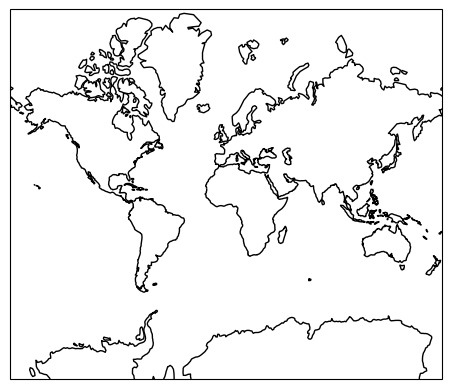

In [7]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

#### **<font color="ForestGreen">  Mapa 2: las features </font>**

En el segundo mapa haremos uso de las "features" o de las capas que podemos añadir a nuestros mapas. 
El detalle completo de estos features lo podemos encontrar aquí: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html. 

Específicamente, vamos a agregar 1) fronteras, 2) diferencia tierra océano, 3) lagos y ríos. 

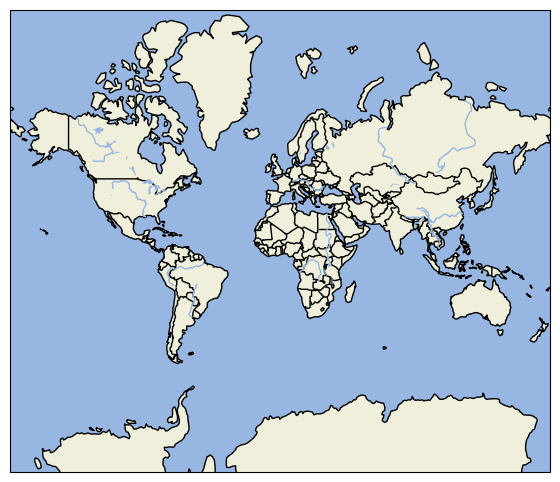

In [8]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mercator())

# Agregar características del mapa
# lineas costeras
ax.coastlines()
# fronteras
ax.add_feature(cfeature.BORDERS)
# tierra
ax.add_feature(cfeature.LAND)
# oceano
ax.add_feature(cfeature.OCEAN)
# lagos
ax.add_feature(cfeature.LAKES)
# rios
ax.add_feature(cfeature.RIVERS)

#### **<font color="ForestGreen"> Las proyecciones </font>**

En Cartopy, una proyección se refiere a la técnica utilizada para representar la superficie tridimensional de la Tierra en un plano bidimensional, como un mapa. Dado que la Tierra es esférica, no es posible representar su superficie de manera precisa en un plano sin distorsionar alguna de sus propiedades, como la forma, la distancia o el área.

Algunas de las proyecciones disponibles en Cartopy:

**1. Proyecciones Cilíndricas:**

- Mercator: Conserva la forma y las direcciones, pero distorsiona el tamaño y la distancia a medida que te alejas del ecuador. Útil para navegación marítima y visualización de datos globales. `cartopy.crs.Mercator()`
- Plate Carrée (Cilíndrica Equidistante): Mapea la longitud y la latitud directamente a coordenadas X e Y, lo que provoca distorsiones en las áreas. `cartopy.crs.PlateCarree()`
- Transversa de Mercator: Similar a la proyección Mercator, pero el cilindro se coloca perpendicular al ecuador. Útil para regiones polares.  `cartopy.crs.TransverseMercator()`.

2. Proyecciones Cónicas:

- Cónica Conforme de Lambert: Conserva los ángulos y, por lo tanto, la forma de las regiones pequeñas, pero distorsiona el tamaño y la forma de las regiones más grandes. Útil para mapas regionales. `cartopy.crs.LambertConformal()`
- Albers Equal Area: Conserva las áreas, pero distorsiona las formas y las distancias. `cartopy.crs.AlbersEqualArea()`

3. Proyecciones Azimutales:

- Orthographic: Muestra el hemisferio visible desde un punto de vista infinitamente lejano. Útil para visualizaciones globales y representaciones artísticas. `cartopy.crs.Orthographic()`
    Estereográfica: Proyecta desde un punto (el polo) en una superficie plana. Útil para regiones polares. `cartopy.crs.Stereographic()`

4. Otras Proyecciones Especiales:

- Mollweide: Proyección pseudo-cónica que minimiza la distorsión de área. Útil para visualización global. `cartopy.crs.Mollweide()`
- Robinson: Proyección pseudocilíndrica que equilibra la distorsión en las formas y las áreas. Útil para mapas mundiales generales. `cartopy.crs.Robinson()`

https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

En el siguiente mapa, además de modificar la proyección, vamos a modificar el fondo, utilizando una imagen pre-existente en cartopy con la instrucción `ax.stock_img()`. 

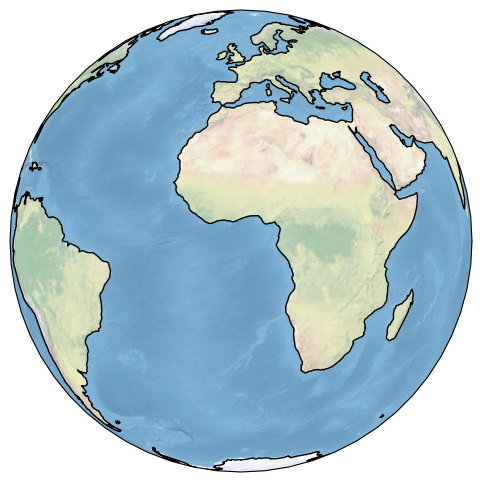

In [9]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic())
# agregar imagen de fondo
ax.stock_img()

# Agregar características del mapa
ax.coastlines()


#### **<font color="ForestGreen">  Agregando datos y anotaciones </font>**

En Cartopy, puedes agregar una variedad de tipos de datos a un mapa para visualizar información geoespacial. Algunos de los tipos de datos comunes que se pueden agregar incluyen:

1. Puntos (`.scatter()`):

Puedes agregar puntos individuales en el mapa utilizando el método `.scatter()` de Matplotlib. Esto es útil para mostrar ubicaciones específicas, como estaciones meteorológicas, ciudades, o puntos de interés.

2. Líneas (`.plot()`):

Puedes trazar líneas o polígonos en el mapa utilizando el método `.plot()` de Matplotlib. Esto es útil para representar características geográficas como ríos, fronteras políticas, límites costeros, etc.

3. Contornos Rellenos (`.contourf()`):

Puedes crear contornos rellenos utilizando el método `.contourf()` de Matplotlib. Esto es útil para visualizar datos de grilla, como la temperatura, la presión, la precipitación, etc., en un mapa.

4. Imágenes de Colores (`.imshow()`):

Puedes mostrar imágenes de colores en el mapa utilizando el método `.imshow()` de Matplotlib. Esto es útil para visualizar datos raster, como imágenes satelitales, mapas de relieve, imágenes de radar, etc.

5. Mapas de Calor (`.pcolormesh()`):

Puedes crear mapas de calor utilizando el método `.pcolormesh()` de Matplotlib. Esto es útil para visualizar datos de grilla con colores escalares, como la temperatura superficial del mar, la concentración de clorofila, etc.

6. Texto y Anotaciones:

Puedes agregar texto y anotaciones al mapa utilizando las funciones de texto de Matplotlib. Esto es útil para etiquetar características geográficas, agregar leyendas, títulos, etc.

Estos son solo algunos ejemplos de los tipos de datos que se pueden agregar a un mapa en Cartopy. La flexibilidad y la integración con Matplotlib permiten una amplia gama de posibilidades para visualizar datos geoespaciales de manera efectiva y atractiva.



In [10]:
filename='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [11]:
ds=xr.open_dataset(filename)
tas=ds['tas']
tas

<xarray.DataArray 'tas' (time: 780, lat: 144, lon: 192)> Size: 86MB
[21565440 values with dtype=float32]
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

Para hacer un mapa, necesitamos en 2D, es muy importante que el objeto que queramos graficar como mapa solo tenga **2 dimensiones**, y que estas sean dimensiones asociadas a la latitud y la longitud. Esto suena muy obvio, pero es fundamental tenerlo en cuenta para procesar nuestros datos. El corolario de esta obviedad es que tenemos que deshacernos de alguna manera de la dimensión del tiempo, esto se puede hacer seleccionando 1 tiempo o haciendo un *promedio temporal*.

In [12]:
promedio_temporal=tas.mean('time')
promedio_temporal

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[227.18353, 227.19351, 227.20134, ..., 227.18213, 227.18462,
        227.18736],
       [228.62073, 228.54483, 228.4702 , ..., 228.87825, 228.78728,
        228.70016],
       [229.64108, 229.5127 , 229.39229, ..., 230.10432, 229.9357 ,
        229.78069],
       ...,
       [253.79936, 253.83119, 253.86198, ..., 253.7002 , 253.73291,
        253.76736],
       [253.54474, 253.55841, 253.57379, ..., 253.49469, 253.51349,
        253.52895],
       [253.36438, 253.36768, 253.37064, ..., 253.35648, 253.35962,
        253.36183]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...

<div class="alert alert-block alert-info">
<b>Tip:</b> Un tip para graficar mapas es siempre guardar las coordenadas de la latitud y la longitud en variables separadas. Esto nos servirá porque casi todas las gráficas tipo mapa requieren de una geolocalización (x,y) y esto es más rápido de escribir si ya las tenemos guardadas como variables separadas.
</div>

In [13]:
lats=tas.lat
lons=tas.lon

Ahora sí pasamos al mapa, utilizando la proyección de Robinson. Lo que haremos se conoce como **mapa de contorno**, en muchos sentidos idéntico a los mapas que hicimos en el tema 1. 

El parámetro transform en Cartopy se utiliza para especificar la proyección de coordenadas en la que se encuentran los datos que se están graficando. Específicamente, transform indica la proyección en la que se encuentran las coordenadas de los datos que se pasan a la función de trazado (por ejemplo, `ax.plot()`, `ax.scatter()`, `ax.contour()`, etc.).

Entonces es muy importante añadir: `transform=ccrs.PlateCarree()`.

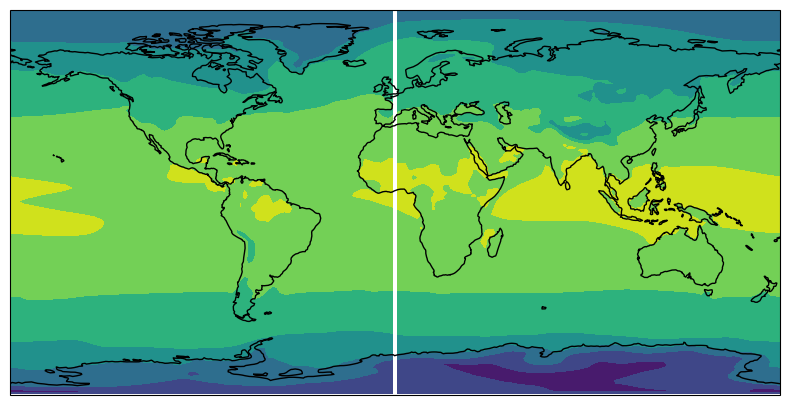

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,promedio_temporal,transform=ccrs.PlateCarree())

**Nuestro plot está bastante feo**

Para empezar a mejorar el plot vamos a hacer 3 cosas. Las primeras dos tienen que ver con los colores del mapa.
En Matplotlib y Cartopy, los parámetros `levels` y `cmap` son utilizados para controlar el número de niveles de contorno y la paleta de colores, respectivamente.

1. Modificar la extensión del mapa usando la instrucción de `ax.set_extent()` la cuál sigue requiere 4 parámetros para definir de dónde a donde va el mapa. Es decir, los límites a donde se concentra el mapa. 

La instrucción requiere de 4 argumentos en el siguiente orden: 

- $lon_{min}$: longitud mínima del mapa. Puede ser en grado Oeste o Este. 
- $lon_{max}$: longitud máxima del mapa. 
- $lat_{min}$: latitud mínima del mapa, la latitud está definida en el intervalo [-90,90]. 
- $lat_{max}$: latitud máxima del mapa, la latitud está definida en el intervalo [-90,90]. 

2. levels: Este parámetro permite especificar los valores de los contornos. Puedes proporcionar una lista de valores para definir manualmente los niveles de contorno, o puedes especificar un número entero para que Matplotlib divida automáticamente el rango de datos en ese número de niveles. Por ejemplo, levels=10 dividirá el rango de datos en 10 niveles de contorno. Mientras que `levels=np.arange(273,300)` hara un nivel para cada color entre 273 y 300 en intervalos de 1 unidad.

3. cmap: Este parámetro determina la paleta de colores que se utiliza para colorear los niveles de contorno. Puedes proporcionar el nombre de una paleta de colores predefinida de Matplotlib, como 'viridis', 'plasma', 'jet', etc. También puedes utilizar paletas de colores personalizadas o definir tu propia paleta de colores. https://matplotlib.org/stable/users/explain/colors/colormaps.html.

4. Agregar extend='both' a la instrucción `.contourf()` para hacer que los colorbar no se "quemen" cuando los datos superen el valor establecido por levels. 

5. Agregar gridlines y sus ticks correspondientes, esto quiere decir las líneas de paralelos y meridianos que siempre son útiles para guiarnos espacialmente en cualquier mapa. Para esto se usa la instrucción `ax.gridlines()`. Ahora, para entender las palabras clave y formato que se usa en esta instrucción es importante checar antes: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html, https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html.

6. Agregar colorbar. En Matplotlib, para agregar un colorbar (barra de color) a un mapa, generalmente se utiliza la función `plt.colorbar()`. Esta función crea un colorbar asociado a la última figura activa y ajusta su tamaño automáticamente para que coincida con el gráfico principal. Sin embargo, en algunos casos, es necesario especificar el objeto al que se le va a agregar el colorbar utilizando la sintaxis `plt.colorbar(objeto)`.

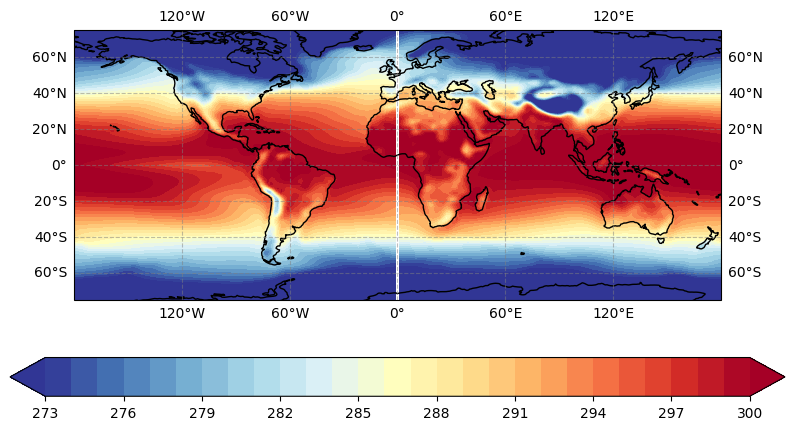

In [20]:
fig = plt.figure(figsize=(10, 5))
# hacemos objeto de mapa
ax = plt.axes(projection=ccrs.PlateCarree())
# agregamos lineas costeras
ax.coastlines()
# plot de contorno
cs=ax.contourf(lons,lats,promedio_temporal,levels=np.arange(273,301),cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree()) #color tmb existe jet
# definimos la extension del mapa
ax.set_extent([0,359.1, -75, 75], crs=ccrs.PlateCarree())
# Agregamos lineas de paralelo y meridiano
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
# agregar colorbar
plt.colorbar(cs,orientation='horizontal')

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo: Mapa de temperatura en México por estación </font>**

<font color="DarkRed"> Analice la temperatura promedio según la simulación que hemos utilizado en cada una de las 4 estaciones y grafique sus resultados para México.
    
<font color="DarkRed">   1. Haga el promedio temporal por estación del año.
    
<font color="DarkRed">    2. Grafique los mapas para cada estación.
    

---
    
El primer paso es hacer el promedio estacional de los datos usando groupby.

In [16]:
# promedio estacional usando groupby
tas_estacion=tas.groupby(tas.time.dt.season).mean()
print(tas_estacion)

<xarray.DataArray 'tas' (season: 4, lat: 144, lon: 192)> Size: 442kB
array([[[245.94193, 245.94122, 245.93942, ..., 245.95607, 245.95255,
         245.94884],
        [246.99538, 246.93495, 246.8756 , ..., 247.1891 , 247.12444,
         247.05968],
        [247.75327, 247.65215, 247.55144, ..., 248.08478, 247.96931,
         247.85976],
        ...,
        [239.41798, 239.47276, 239.52602, ..., 239.24591, 239.30353,
         239.36336],
        [239.06711, 239.08998, 239.11534, ..., 238.98233, 239.01378,
         239.03882],
        [238.76242, 238.76747, 238.77211, ..., 238.7498 , 238.75543,
         238.75801]],

       [[216.73283, 216.75627, 216.7748 , ..., 216.70268, 216.71317,
         216.72769],
        [218.43428, 218.35759, 218.27806, ..., 218.71625, 218.61507,
         218.51852],
        [219.48215, 219.34363, 219.2213 , ..., 220.00166, 219.80919,
         219.63423],
...
        [250.29636, 250.33632, 250.37685, ..., 250.16791, 250.20993,
         250.25383],
        [250

Tenemos que encontrar cómo hacerle para seleccionar los datos de la estación, una por una, para graficar esos objetos por separado.

In [31]:
for season in tas_estacion.season:
    print(season.data)
    promedio_estacional=tas_estacion.sel(season=season) #sel hace un recorte, seleccionar
    print(promedio_estacional)

#manera análoga
#for ij in tas_estacion:
    #print(ij.season)
    #break
#sujeto a error de que no identifique la primera estación

DJF
<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[245.94193, 245.94122, 245.93942, ..., 245.95607, 245.95255,
        245.94884],
       [246.99538, 246.93495, 246.8756 , ..., 247.1891 , 247.12444,
        247.05968],
       [247.75327, 247.65215, 247.55144, ..., 248.08478, 247.96931,
        247.85976],
       ...,
       [239.41798, 239.47276, 239.52602, ..., 239.24591, 239.30353,
        239.36336],
       [239.06711, 239.08998, 239.11534, ..., 238.98233, 239.01378,
        239.03882],
       [238.76242, 238.76747, 238.77211, ..., 238.7498 , 238.75543,
        238.75801]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
    season   <U3 12B 'DJF'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air te

DJF
JJA
MAM
SON


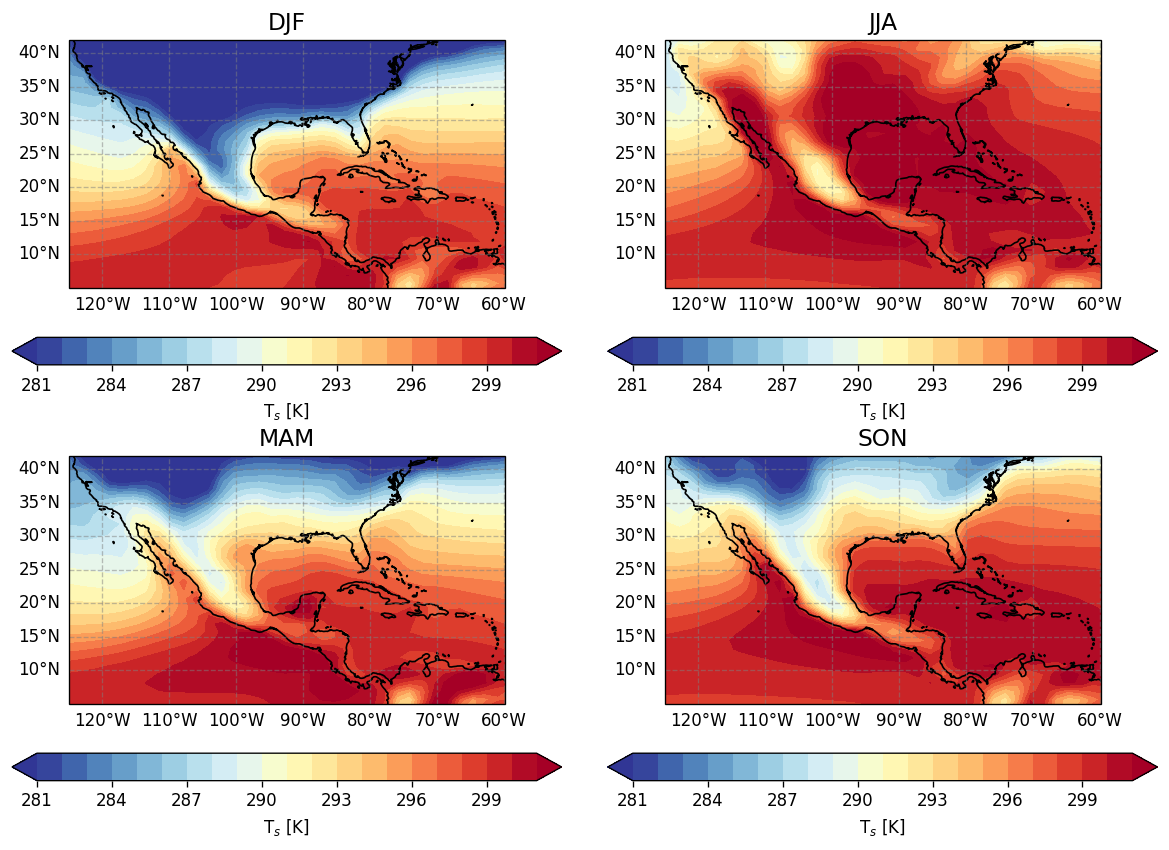

In [23]:
fig = plt.figure(figsize=(10, 7),dpi=120)
# definimos los levelss del mapa de colores
levelss=np.arange(281,302)
for iseason,season in enumerate(tas_estacion.season):
    print(season.data)
    # seleccionar la estacion
    promedio_estacional=tas_estacion.sel(season=season)
    # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # grafico de contorno
    cs=ax.contourf(lons,lats,promedio_estacional,levels=levelss,cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree())
    ## arreglando el plot
    # extension del mapa
    ax.set_extent([235,300.1, 5, 42], crs=ccrs.PlateCarree())
    # lineas de paralelos
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    # colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('T$_s$ [K]')
    # titulo del plot
    plt.title(season.data,fontsize=14)
# ultimo arreglo, apretar el mapa
plt.tight_layout(h_pad=0.5,pad=0.5)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 5 - Mapa de temperatura para Australia </font>**

<font color="DarkBlue"> 1. Repita el ejemplo anterior para la región de Australia. Modifique el mapa adecuadamente utilizando una proyección diferente a la que se utiliza en el ejemplo.
    
<font color="DarkBlue">  2. Ordene los mapas para que se grafiquen en el orden siguiente: DJF, MAM, JJA, SON.
    
    
---

In [32]:
orden = ["DJF", "MAM", "JJA", "SON"]
for season in orden:
    #print(season.data)
    promedio_estacional = tas_estacion.sel(season=season)  # sel hace un recorte, seleccionar
    print(promedio_estacional)

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[245.94193, 245.94122, 245.93942, ..., 245.95607, 245.95255,
        245.94884],
       [246.99538, 246.93495, 246.8756 , ..., 247.1891 , 247.12444,
        247.05968],
       [247.75327, 247.65215, 247.55144, ..., 248.08478, 247.96931,
        247.85976],
       ...,
       [239.41798, 239.47276, 239.52602, ..., 239.24591, 239.30353,
        239.36336],
       [239.06711, 239.08998, 239.11534, ..., 238.98233, 239.01378,
        239.03882],
       [238.76242, 238.76747, 238.77211, ..., 238.7498 , 238.75543,
        238.75801]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
    season   <U3 12B 'DJF'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temper

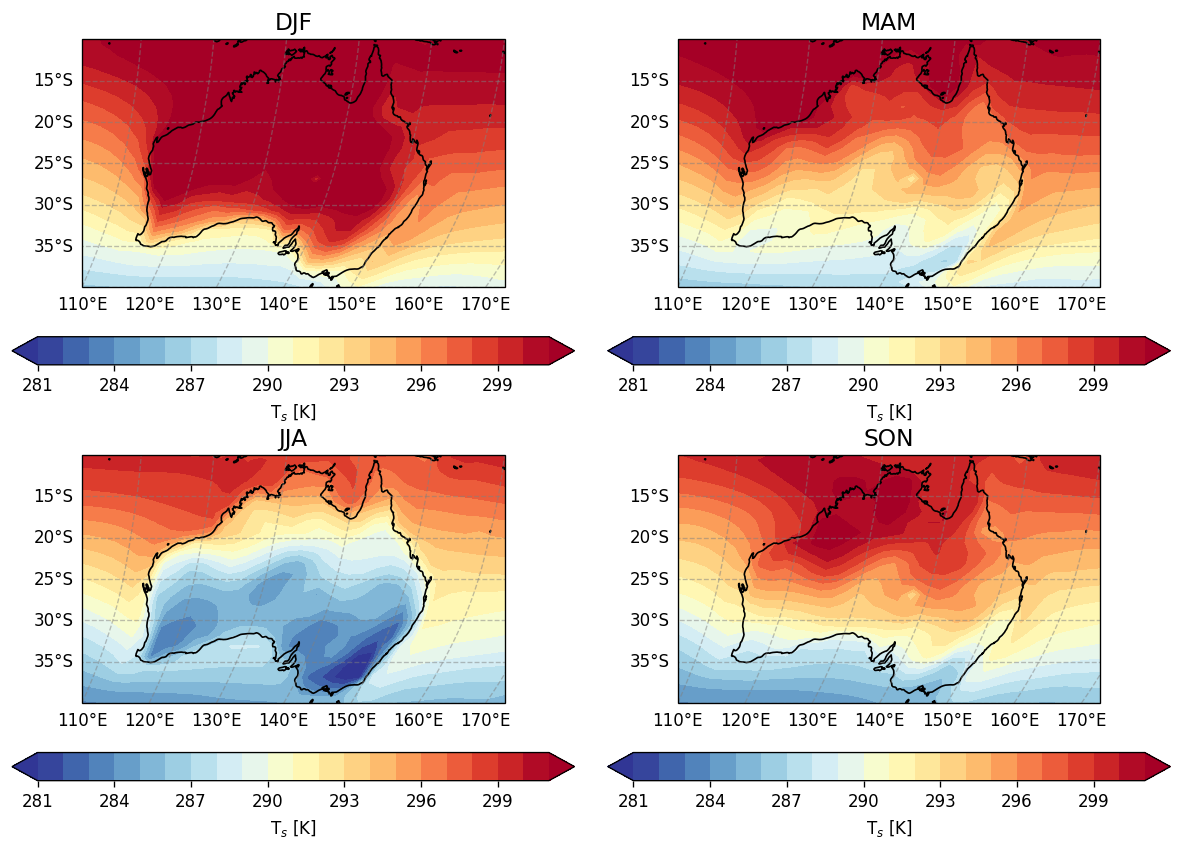

In [36]:
fig = plt.figure(figsize=(10, 7),dpi=120)
# definimos los levelss del mapa de colores
levelss=np.arange(281,302)
for iseason,season in enumerate(orden):
    #print(season.data)
    # seleccionar la estacion
    promedio_estacional=tas_estacion.sel(season=season)
    # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.Robinson())
    # agregamos lineas costeras
    ax.coastlines()
    # grafico de contorno
    cs=ax.contourf(lons,lats,promedio_estacional,levels=levelss,cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree())
    ## arreglando el plot
    # extension del mapa
    ax.set_extent([110,160, -10, -40], crs=ccrs.PlateCarree())
    # lineas de paralelos
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    # colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('T$_s$ [K]')
    # titulo del plot
    plt.title(orden[0+iseason],fontsize=14)
# ultimo arreglo, apretar el mapa
plt.tight_layout(h_pad=0.5,pad=0.5)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 6 - Cambio climático </font>**

<font color="DarkBlue"> 1. Calcule el promedio temporal de la temperatura superficial de esta simulación en dos períodos. Primero, para el periodo 1950-1980 y luego para el periodo 1980-2014.
    
<font color="DarkBlue">  2. Grafique ambos promedios como mapas globales, usando la temperatura absoluta en Celsius y la proyección de Robinson.
    
<font color="DarkBlue">  3. Haga un mapa de la diferencia de temperatura entre el período reciente menos el período más antiguo.
    
    
---

In [61]:
tas_1=tas[(tas.time.dt.year>=1950)&(tas.time.dt.year<=1980)]
tas_2=tas[(tas.time.dt.year>=1980)&(tas.time.dt.year<=2014)]
tas1=tas_1.mean('time')
tas2=tas_2.mean('time')
print(tas1, tas2)

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[226.89073, 226.90007, 226.90915, ..., 226.888  , 226.89044,
        226.89374],
       [228.32434, 228.25018, 228.17711, ..., 228.57976, 228.48906,
        228.40344],
       [229.34912, 229.22076, 229.1015 , ..., 229.8088 , 229.64287,
        229.48813],
       ...,
       [253.15593, 253.18712, 253.21866, ..., 253.05492, 253.08894,
        253.12401],
       [252.91583, 252.92984, 252.94403, ..., 252.86717, 252.88554,
        252.90141],
       [252.76622, 252.76962, 252.7727 , ..., 252.75827, 252.76129,
        252.76389]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ... <xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[227.46889, 227.47855, 227.48505, ..., 227.46944, 227.47144,
        227.47319],
       [228.88509, 228.80775, 228.7314 ,

Text(0.5, 1.0, 'Mapa de 1980-2014')

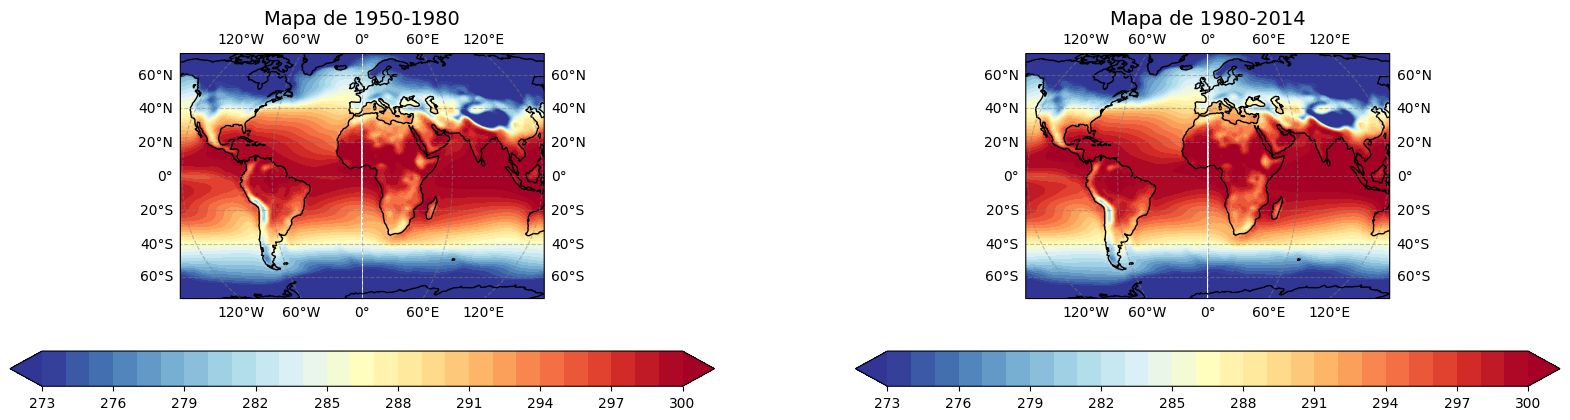

In [63]:
fig = plt.figure(figsize=(20, 10))
# hacemos objeto de mapa
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson())
# agregamos lineas costeras
ax1.coastlines()
# plot de contorno
cs1=ax1.contourf(lons,lats,tas1,levels=np.arange(273,301),cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree()) #color tmb existe jet
ax1.set_extent([0,359.1, -75, 75], crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
plt.colorbar(cs1,orientation='horizontal')
plt.title('Mapa de 1950-1980',fontsize=14)

ax = fig.add_subplot(2, 2, 2, projection=ccrs.Robinson())
ax.coastlines()
cs2=ax.contourf(lons,lats,tas2,levels=np.arange(273,301),cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree()) #color tmb existe jet
# definimos la extension del mapa
ax.set_extent([0,359.1, -75, 75], crs=ccrs.PlateCarree())
# Agregamos lineas de paralelo y meridiano
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
# agregar colorbar
plt.colorbar(cs2,orientation='horizontal')
plt.title('Mapa de 1980-2014',fontsize=14)